# Carregando os dados:

In [1]:
import pandas as pd

filename = "Passageiros.csv"
passageiros = pd.read_csv(filename)
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


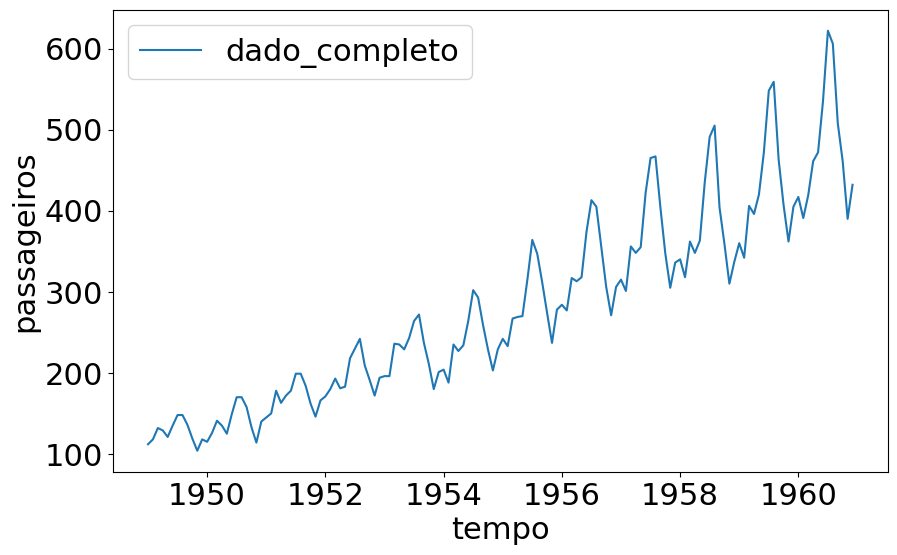

In [2]:
import seaborn as sns
import matplotlib as mpl


mpl.rcParams['figure.figsize'] = (10, 6)
mpl.rcParams['font.size'] = 22
sns.lineplot(x = 'tempo', y = 'passageiros', data = passageiros, label = 'dado_completo');

# Um pouco de teoria sobre sklearn

## StandardScaler

O `StandardScaler` é uma técnica de pré-processamento de dados que visa padronizar as features (variáveis) de um conjunto de dados. A ideia é transformar as features para que elas tenham média zero e desvio padrão igual a um. Isso é importante porque muitos algoritmos de Machine Learning assumem que as features estão em uma escala similar e têm distribuição normal ou aproximadamente normal.

Aqui está como você pode usar o `StandardScaler` no sklearn:

```python
from sklearn.preprocessing import StandardScaler

# Crie uma instância do StandardScaler
scaler = StandardScaler()

# Ajuste o scaler aos dados de treinamento
scaler.fit(X_train)

# Aplique a transformação aos dados de treinamento
X_train_scaled = scaler.transform(X_train)

# Aplique a mesma transformação aos dados de teste
X_test_scaled = scaler.transform(X_test)
```

Aqui está o que cada passo faz:

1. Importe a classe `StandardScaler` do módulo `sklearn.preprocessing`.
2. Crie uma instância do `StandardScaler` chamada `scaler`.
3. Ajuste o scaler aos dados de treinamento chamando o método `fit(X_train)`, onde `X_train` é uma matriz (ou dataframe) contendo as features de treinamento.
   - Durante esse processo, o scaler calcula a média e o desvio padrão de cada feature.
4. Aplique a transformação aos dados de treinamento chamando o método `transform(X_train)`.
   - Isso ajusta as features de treinamento para que tenham média zero e desvio padrão igual a um.
   - O resultado é armazenado na matriz `X_train_scaled`.
5. Aplique a mesma transformação aos dados de teste chamando o método `transform(X_test)`.
   - Isso ajusta as features de teste usando a mesma média e desvio padrão calculados a partir dos dados de treinamento.
   - O resultado é armazenado na matriz `X_test_scaled`.

Vamos ver um exemplo para entender melhor. Suponha que temos os seguintes dados de treinamento:

```
X_train = [[10, 2],
           [8, 3],
           [5, 1]]
```

E os seguintes dados de teste:

```
X_test = [[12, 4],
          [4, 0],
          [6, 2]]
```

Vamos aplicar o `StandardScaler`:

```python
from sklearn.preprocessing import StandardScaler

X_train = [[10, 2],
           [8, 3],
           [5, 1]]

X_test = [[12, 4],
          [4, 0],
          [6, 2]]

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Dados de treinamento originais:\n", X_train)
print("Dados de treinamento padronizados:\n", X_train_scaled)
print("Dados de teste originais:\n", X_test)
print("Dados de teste padronizados:\n", X_test_scaled)
```

A saída será:
```python
# Dados de treinamento originais:
 [[10, 2], [8, 3], [5, 1]]
    
# Dados de treinamento padronizados:
 [[ 1.22474487 -0.26726124],
 [ 0.         1.33630621],
 [-1.22474487 -1.06904497]]
    
# Dados de teste originais:
 [[12, 4], [4, 0], [6, 2]]
    
# Dados de teste padronizados:
 [[ 2.44948974  1.87082869],
 [-0.81649658 -2.13808994],
 [-0.40824829 -0.26726124]]
```

Observe que os dados de treinamento originais foram transformados para ter média zero e desvio padrão igual a um. As features foram ajustadas individualmente, ou seja, cada feature foi transformada separadamente com base na sua média e desvio padrão. O mesmo ajuste foi aplicado aos dados de teste usando as mesmas médias e desvios padrão dos dados de treinamento.

A padronização dos dados é útil em vários aspectos. Por exemplo, muitos algoritmos de Machine Learning, como regressão linear, regressão logística e SVM, podem se beneficiar de features padronizadas, pois a escala das features não afetará o resultado do modelo. Além disso, a padronização pode ajudar a evitar que uma feature tenha mais influência do que outras devido à escala.

Em resumo, o `StandardScaler` é uma técnica de pré-processamento que padroniza as features, transformando-as para ter média zero e desvio padrão igual a um. Isso é feito usando o método `fit` para calcular as estatísticas de média e desvio padrão a partir dos dados de treinamento e o método `transform` para aplicar a transformação tanto nos dados de treinamento quanto nos dados de teste.

Sendo assim, vamos aplicar essas ideias dentro do nosso projeto:

# Escalando os dados:

In [3]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(passageiros)

StandardScaler()

In [4]:
dado_escalado = sc.transform(passageiros)

In [5]:
x = dado_escalado[:,0] # Features - Características - Tempo
y = dado_escalado[:,1] # Alvo - Número de passageiros

Text(0.5, 0, 'Data')

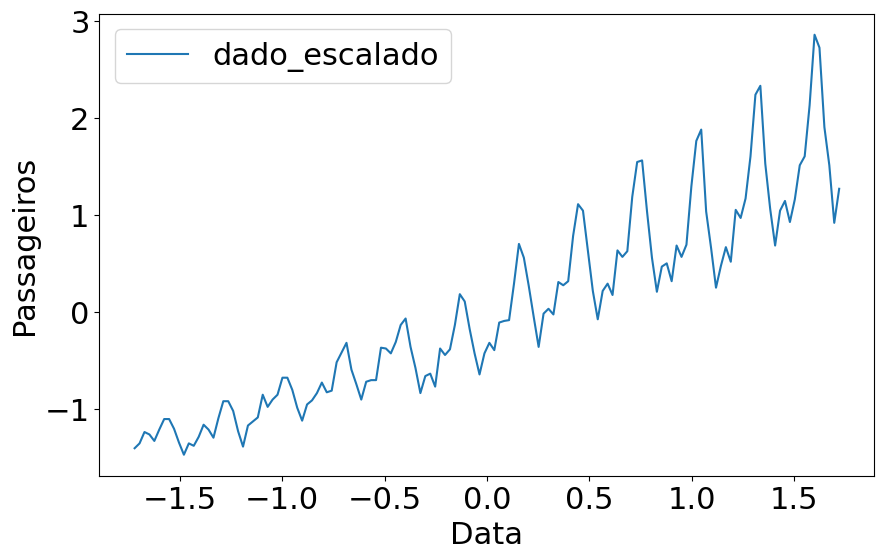

In [6]:
import matplotlib.pyplot as plt

sns.lineplot(x = x, y = y, label = 'dado_escalado')
plt.ylabel('Passageiros')
plt.xlabel('Data')

# Dividindo os dados em treino e teste

In [7]:
tamanho_treino = int(len(passageiros)*0.9) #Pegando 90% dos dados para treino
tamanho_teste = len(passageiros)-tamanho_treino #O resto vamos reservar para teste

tamanho_treino, tamanho_teste

(129, 15)

In [8]:
xtreino = x[0:tamanho_treino]
ytreino = y[0:tamanho_treino]

In [9]:
xteste = x[tamanho_treino:len(passageiros)]
yteste = y[tamanho_treino:len(passageiros)]

<AxesSubplot:>

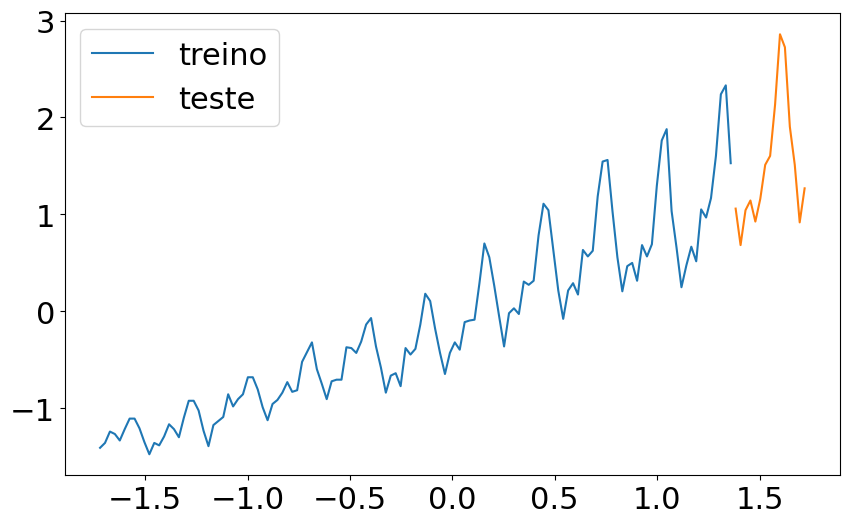

In [10]:
sns.lineplot(x = xtreino, y = ytreino, label = 'treino') 
sns.lineplot(x = xteste, y = yteste, label = 'teste') 

# Regressão

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

A função `Dense()` é uma camada de neurônios em uma rede neural do Keras, uma biblioteca popular de Deep Learning. A função Dense() cria uma camada totalmente conectada, em que cada neurônio da camada está conectado a todos os neurônios da camada anterior. Aqui estão alguns dos parâmetros mais comuns que podemos passar para a função `Dense()`:

- **`units`**: Especifica o número de neurônios (unidades) na camada. É um parâmetro obrigatório e deve ser um número inteiro positivo. Quanto maior o número de unidades, maior a capacidade da camada em aprender representações complexas dos dados.

- **`input_dim`**: O parâmetro input_dim é usado para especificar a dimensão (número de features) dos dados de entrada na primeira camada da rede neural quando se está construindo uma rede neural sequencial no Keras. O input_dim é usado em vez de input_shape quando se trabalha com uma rede neural sequencial simples, onde não há necessidade de especificar explicitamente a forma completa dos dados de entrada. Em vez disso, basta fornecer o número de features (dimensão) dos dados de entrada.

- **`kernel_initializer (A)`**: Especifica como os pesos da camada serão inicializados. É responsável por definir os valores iniciais dos pesos dos neurônios. Alguns exemplos comuns de inicializadores de pesos são `'random_uniform'` (inicialização aleatória com distribuição uniforme), `'glorot_uniform'` (inicialização de Glorot com distribuição uniforme) e `'he_uniform'` (inicialização de He com distribuição uniforme). O valor padrão é `'glorot_uniform'`.

- **`use_bias (B)`**: Um valor booleano que especifica se a camada usará bias ou não. O bias é útil para adicionar flexibilidade aos neurônios e geralmente é ativado (True) por padrão.

- **`activation (C)`**: Especifica a função de ativação a ser usada nos neurônios da camada. A função de ativação introduz não-linearidade na rede neural e ajuda a aprender relações complexas nos dados. Alguns exemplos comuns de funções de ativação são `'relu'` (retificação linear), `'sigmoid'` (sigmoide), `'tanh'` (tangente hiperbólica) e `'softmax'` (usada em problemas de classificação multiclasse). Se nenhum valor for especificado, nenhuma função de ativação será aplicada (camada linear).

- **`bias_initializer`**: Especifica como os bias da camada serão inicializados. O bias é um valor adicional adicionado aos neurônios que permite que a camada aprenda a função desejada de maneira mais flexível. Alguns exemplos comuns de inicializadores de bias são `'zeros'` (inicialização com valor zero), `'ones'` (inicialização com valor um) e `'random_normal'` (inicialização aleatória com distribuição normal). O valor padrão é `'zeros'`.

- **`input_shape`**: Especifica a forma dos dados de entrada na primeira camada da rede neural. É necessário fornecer `input_shape` apenas para a primeira camada da rede, pois as camadas subsequentes inferirão automaticamente a forma de entrada com base nas saídas das camadas anteriores.

Esses são apenas alguns dos parâmetros mais comuns que podem ser passados para a função `Dense()`. Há também outros parâmetros disponíveis, como `kernel_regularizer` e `bias_regularizer`, que permitem regularização dos pesos e bias da camada.

Vale ressaltar que a função `Dense()` é usada em conjunto com outras camadas para construir uma rede neural completa, como uma rede neural sequencial ou uma rede neural com múltiplas entradas ou saídas.


$$\large\displaystyle y = f(x) = A.x + B$$

$$\large\displaystyle a(y) = C.y$$



In [12]:
regressor = Sequential()

In [13]:
# Vies = True

densidade = Dense(units = 1, 
                  input_dim = 1, 
                  kernel_initializer='Ones', 
                  activation = 'linear',
                  use_bias = True)

In [14]:
regressor.add(densidade)
regressor.compile(loss='mean_squared_error', optimizer = 'adam')

Dentro do método `compile()` do Keras, você pode passar vários parâmetros que definem a configuração do processo de treinamento da sua rede neural. Aqui estão alguns dos parâmetros mais comuns e sua função:

- `optimizer`: Especifica o otimizador a ser usado durante o treinamento da rede neural. O otimizador é responsável por atualizar os pesos da rede com base no erro calculado durante o treinamento. Alguns exemplos populares de otimizadores são `'adam'`, `'sgd'` (descida de gradiente estocástica) e `'rmsprop'`. Cada otimizador tem suas próprias configurações e hiperparâmetros adicionais que podem ser ajustados.

- `loss`: Especifica a função de perda (loss function) a ser usada durante o treinamento. A função de perda mede o quão bem o modelo está se saindo durante o treinamento, comparando as previsões do modelo com os rótulos (targets) reais. A escolha da função de perda depende do tipo de problema que você está resolvendo. Por exemplo, para um problema de classificação binária, você pode usar `'binary_crossentropy'`, e para um problema de regressão, você pode usar `'mean_squared_error'`.

- `metrics`: Uma lista das métricas a serem avaliadas durante o treinamento e teste do modelo. Essas métricas são usadas para monitorar o desempenho do modelo durante o treinamento e podem ser úteis para fins de avaliação. Alguns exemplos de métricas comuns são `'accuracy'` (acurácia) para problemas de classificação e `'mean_squared_error'` para problemas de regressão.

- `loss_weights`: Um dicionário ou uma lista que especifica os pesos atribuídos a diferentes funções de perda (loss functions) quando a rede neural possui várias saídas. Isso é útil quando a rede neural tem várias tarefas de aprendizado, e você deseja dar mais importância a uma tarefa específica em relação às outras.

- `metrics_weights`: Um dicionário ou uma lista que especifica os pesos atribuídos a diferentes métricas quando a rede neural possui várias saídas. Isso é útil quando você deseja dar mais importância a uma métrica específica em relação às outras ao avaliar o desempenho do modelo.

- `sample_weight_mode`: Especifica como as amostras são ponderadas durante o treinamento da rede neural. Isso é útil quando você deseja dar mais peso a algumas amostras em relação a outras, com base em algum critério específico.

- `weighted_metrics`: Uma lista de métricas que serão usadas para calcular a média ponderada das métricas durante o treinamento e teste do modelo. Isso é útil quando você deseja calcular métricas com pesos diferentes, por exemplo, considerando a distribuição de classes desequilibrada.

Esses são apenas alguns dos parâmetros mais comuns que podem ser passados para o método `compile()` do Keras. Existem outros parâmetros adicionais disponíveis, dependendo das necessidades específicas do seu modelo, como `learning_rate`, `momentum`, `decay`, entre outros. É importante consultar a documentação do Keras para obter mais informações sobre os parâmetros disponíveis e como usá-los adequadamente para a sua

# optimizer = 'adam'

O 'adam' é um algoritmo de otimização popular e eficiente usado em redes neurais. Ele é uma combinação do método do gradiente descendente estocástico (SGD) com algumas ideias do método de otimização adaptativa (AdaGrad) e do algoritmo RMSprop.

A sigla 'adam' significa Adaptive Moment Estimation, que se refere às duas principais ideias incorporadas no algoritmo: adaptação dos passos do gradiente (moment) e adaptação da taxa de aprendizado (estimation).

O 'adam' utiliza um conceito chamado momento, que é uma média móvel dos gradientes anteriores. Ele armazena duas médias móveis exponenciais: o momento do gradiente (momentum) e o momento do gradiente ao quadrado (momentum squared). Essas médias móveis são atualizadas a cada iteração do treinamento.

As fórmulas matemáticas do 'adam' são as seguintes:

1. Cálculo dos momentos do gradiente:

- Momento do gradiente:
 $$\large m_t = \beta_1 \cdot m_{\text{prev}} + (1 - \beta_1) \cdot g$$
- Momento do gradiente ao quadrado:
 $$\large v_t = \beta_2 \cdot v_{\text{prev}} + (1 - \beta_2) \cdot g^2$$
- Traduzindo para código (Python):
```python
m_t = beta_1 * m_prev + (1 - beta_1) * g
v_t = beta_2 * v_prev + (1 - beta_2) * g^2
```

Onde:

- `m_t` ($m_t$) é o momento atualizado do gradiente.
- `v_t` ($v_t$) é o momento atualizado do gradiente ao quadrado.
- `g` ($g$) é o valor do gradiente para um dado peso (ou seja, a derivada parcial da função de perda em relação ao peso).
- `beta_1` ($\beta_1$) e `beta_2` ($\beta_2$) são hiperparâmetros que controlam a taxa de decaimento dos momentos.
- `m_prev` ($m_{\text{prev}}$) e `v_prev` ($v_{\text{prev}}$) são os momentos anteriores do gradiente.

<hr>

2. Correção dos momentos do gradiente para lidar com o viés inicial:

- Momento do gradiente corrigido:
 $$\large \hat{m}_t = \frac{m_t}{1 - \beta_1^t}$$
- Momento do gradiente ao quadrado corrigido:
 $$\large \hat{v}_t = \frac{v_t}{1 - \beta_2^t}$$
- Traduzindo para código (Python):
```python
m_t_hat = m_t / (1 - beta_1^t)
v_t_hat = v_t / (1 - beta_2^t)
```

Onde:
- `m_t_hat` ($\hat{m}_t$) representa o momento do gradiente corrigido.
- `v_t_hat` ($\hat{v}_t$) representa o momento do gradiente ao quadrado corrigido.
- `t` ($t$) é o número de iterações.

<hr>

3. Atualização dos pesos:
- Pesos atualizados:
 $$\large w_t = w_{\text{prev}} - \text{learning_rate} \cdot \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}$$
- Traduzindo para código (Python):
```python
w_t = w_prev - learning_rate * m_t_hat / (sqrt(v_t_hat) + epsilon)
```

Onde:
- `w_t` ($w_t$) são os pesos atualizados.
- `v_t_hat` ($\hat{v}_t$) representa o momento do gradiente ao quadrado corrigido.
- `w_prev` ($w_{\text{prev}}$) são os pesos anteriores.
- `learning_rate` é a taxa de aprendizado.
- `epsilon` ($\epsilon$) é um pequeno valor para evitar divisão por zero.

<hr>

O 'adam' combina o momento do gradiente (para acelerar a convergência em direção ao mínimo) e o momento do gradiente ao quadrado (para ajustar a taxa de aprendizado de forma adaptativa para cada peso). Essa combinação ajuda a lidar com problemas de superfície de otimização complexa, permitindo que o algoritmo se adapte a diferentes escalas de gradiente em diferentes direções.

O 'adam' é amplamente usado devido à sua eficiência e boa performance em muitos cenários de treinamento de redes neurais. No entanto, é importante ajustar os hiperparâmetros do 'adam', como `learning_rate`, `beta_1` e `beta_2`, para obter o melhor desempenho no seu problema específico.


# loss = 'mean_squared_error'

O erro médio quadrático (mean squared error - MSE) é uma função de perda comumente usada em problemas de regressão. Ele mede a média dos quadrados das diferenças entre as previsões do modelo e os valores reais (rótulos). ***Quanto menor o valor do MSE, melhor é o desempenho do modelo em ajustar os dados de treinamento***.

A fórmula matemática para calcular o MSE é a seguinte:

$$\large MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

Onde:
- $ n $ é o número total de amostras (exemplos) no conjunto de dados.
- $ y_i $ é o valor real do i-ésimo exemplo.
- $ \hat{y}_i $ é a previsão do modelo para o i-ésimo exemplo.

O cálculo do MSE envolve a diferença entre o valor real e a previsão do modelo para cada exemplo, elevada ao quadrado. Essas diferenças ao quadrado são então somadas e divididas pelo número total de exemplos para obter a média.


In [15]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [16]:
regressor.fit(xtreino, ytreino)
y_predict = regressor.predict(xtreino)

5/5 [==============================] - 0s 2ms/step


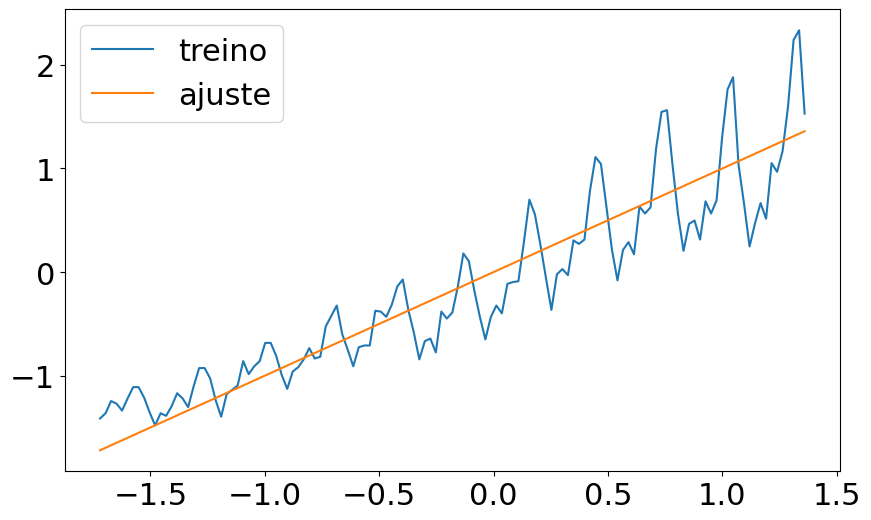

In [17]:
sns.lineplot(x = xtreino, y = ytreino, label='treino')
sns.lineplot(x = xtreino, y = y_predict[:,0], label='ajuste');

In [18]:
regressor = Sequential()

In [19]:
# Vies = False

densidade = Dense(units = 1, 
                  input_dim = 1, 
                  kernel_initializer='Ones', 
                  activation = 'linear',
                  use_bias = False)


In [20]:
regressor.add(densidade)
regressor.compile(loss='mean_squared_error', optimizer = 'adam')

In [21]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 1         
                                                                 
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


In [22]:
regressor.fit(xtreino, ytreino)
y_predict = regressor.predict(xtreino)

5/5 [==============================] - 0s 1ms/step


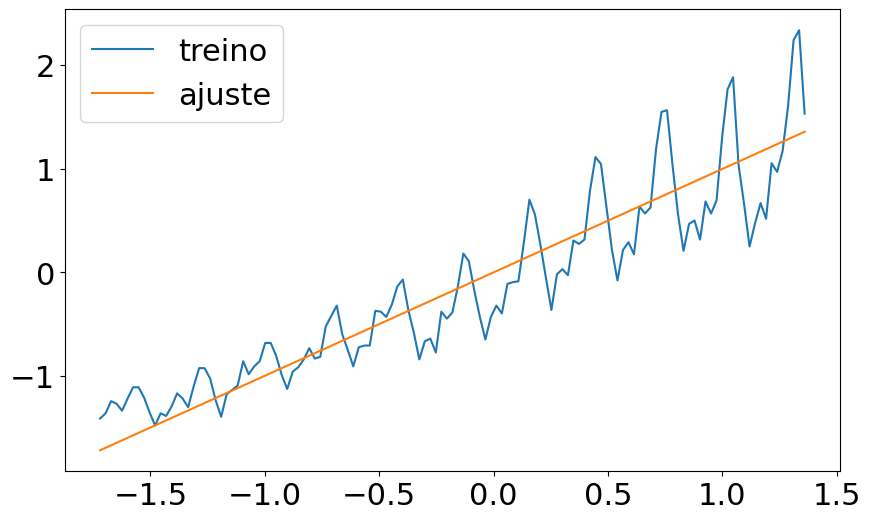

In [23]:
sns.lineplot(x = xtreino, y = ytreino, label='treino')
sns.lineplot(x = xtreino, y = y_predict[:,0], label='ajuste');

In [24]:
d = {'tempo': xtreino, 'passageiros': y_predict[:,0]}

In [25]:
resultados = pd.DataFrame(data = d)

In [26]:
resultados.head()

,tempo,passageiros
0,-1.720064,-1.713632
1,-1.696007,-1.689665
2,-1.671950,-1.665698
3,-1.647894,-1.641731
4,-1.623837,-1.617764


In [27]:
# Transformação inversa:

resultados_transf = sc.inverse_transform(resultados)

In [28]:
# Olhando o formato:

resultados_transf

array([[1949.        ,   75.43559221],
       [1949.08333333,   78.30079889],
       [1949.16666667,   81.16603408],
       [1949.25      ,   84.03124076],
       [1949.33333333,   86.8964617 ],
       [1949.41666667,   89.76168263],
       [1949.5       ,   92.62690357],
       [1949.58333333,   95.49211025],
       [1949.66666667,   98.35733118],
       [1949.75      ,  101.22255212],
       [1949.83333333,  104.0877588 ],
       [1949.91666667,  106.95299399],
       [1950.        ,  109.81820067],
       [1950.08333333,  112.68340735],
       [1950.16666667,  115.54864254],
       [1950.25      ,  118.41384922],
       [1950.33333333,  121.27907015],
       [1950.41666667,  124.14427684],
       [1950.5       ,  127.00949777],
       [1950.58333333,  129.87471871],
       [1950.66666667,  132.73992539],
       [1950.75      ,  135.60516057],
       [1950.83333333,  138.47036726],
       [1950.91666667,  141.33558819],
       [1951.        ,  144.20080913],
       [1951.08333333,  1

In [29]:
# Retornando ao formato antigo:

resultados_transf = pd.DataFrame(resultados_transf)

In [30]:
# Renomeando as colunas:

resultados_transf.columns = ['tempo', 'passageiros']

In [31]:
# Olhando o DataFrame

resultados_transf.head()

,tempo,passageiros
0,1949.000000,75.435592
1,1949.083333,78.300799
2,1949.166667,81.166034
3,1949.250000,84.031241
4,1949.333333,86.896462


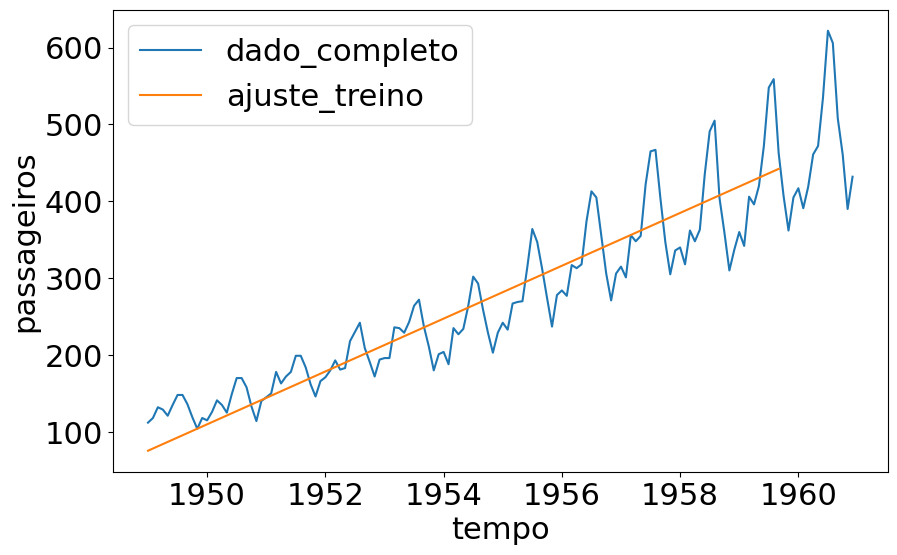

In [32]:
sns.lineplot(x = 'tempo', y = 'passageiros', data = passageiros, label = 'dado_completo')
sns.lineplot(x = 'tempo', y = 'passageiros', data = resultados_transf, label = 'ajuste_treino');

In [33]:
y_predict_teste = regressor.predict(xteste)

1/1 [==============================] - 0s 22ms/step


In [34]:
d = {'tempo': xteste, 'passageiros': y_predict_teste[:,0]}
resultados_teste = pd.DataFrame(data = d)

In [35]:
resultados_transf_teste = sc.inverse_transform(resultados_teste)

In [36]:
resultados_transf_teste = pd.DataFrame(resultados_transf_teste)

In [37]:
resultados_transf_teste.columns = ['tempo', 'passageiros']

<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

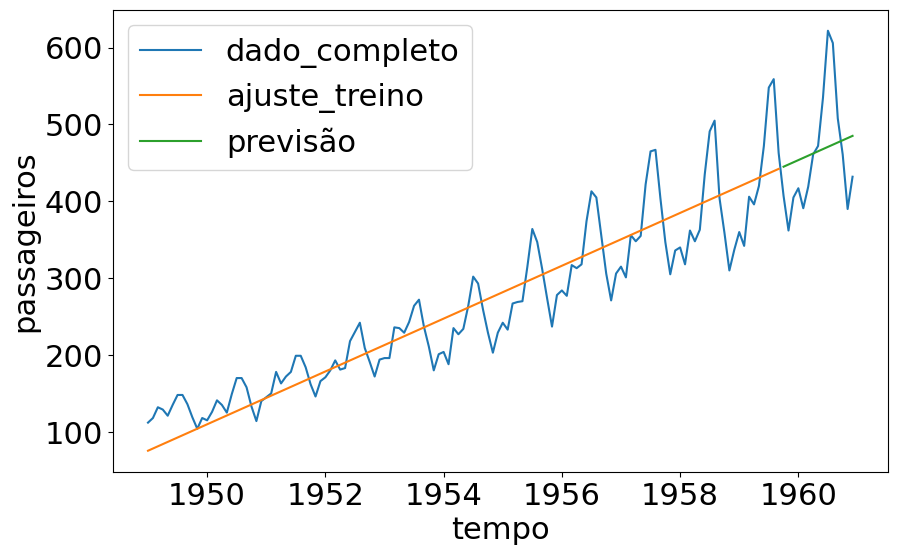

In [38]:
sns.lineplot(x = 'tempo', y = 'passageiros', data = passageiros, label = 'dado_completo')
sns.lineplot(x = 'tempo', y = 'passageiros', data = resultados_transf, label = 'ajuste_treino')
sns.lineplot(x = 'tempo', y = 'passageiros', data = resultados_transf_teste, label = 'previsão')


# Adicionando camadas

In [39]:
regressor2 = Sequential()

In [40]:
regressor2.add(Dense(units = 8,
                   input_dim = 1,
                   kernel_initializer = 'random_uniform',
                   activation = 'linear',
                   use_bias = False))

regressor2.add(Dense(units = 8,
                   kernel_initializer = 'random_uniform',
                   activation = 'linear',
                   use_bias = False))

regressor2.add(Dense(units = 1,
                   kernel_initializer = 'random_uniform',
                   activation = 'linear',
                   use_bias = False))

In [41]:
regressor2.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [42]:
regressor2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8)                 8         
                                                                 
 dense_3 (Dense)             (None, 8)                 64        
                                                                 
 dense_4 (Dense)             (None, 1)                 8         
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [43]:
regressor2.fit(xtreino, ytreino, epochs=200)

Epoch 1/200
5/5 [==============================] - 0s 2ms/step - loss: 0.8098
Epoch 2/200
5/5 [==============================] - 0s 1ms/step - loss: 0.8092
Epoch 3/200
5/5 [==============================] - 0s 2ms/step - loss: 0.8086
Epoch 4/200
5/5 [==============================] - 0s 2ms/step - loss: 0.8079
Epoch 5/200
5/5 [==============================] - 0s 1ms/step - loss: 0.8068
Epoch 6/200
5/5 [==============================] - 0s 2ms/step - loss: 0.8054
Epoch 7/200
5/5 [==============================] - 0s 2ms/step - loss: 0.8035
Epoch 8/200
5/5 [==============================] - 0s 2ms/step - loss: 0.8011
Epoch 9/200
5/5 [==============================] - 0s 2ms/step - loss: 0.7977
Epoch 10/200
5/5 [==============================] - 0s 2ms/step - loss: 0.7933
Epoch 11/200
5/5 [==============================] - 0s 2ms/step - loss: 0.7872
Epoch 12/200
5/5 [==============================] - 0s 2ms/step - loss: 0.7789
Epoch 13/200
5/5 [==============================] - 0s 2ms/st

In [44]:
y_predict = regressor2.predict(xtreino)

5/5 [==============================] - 0s 1ms/step


In [45]:
y_predict_teste = regressor2.predict(xteste)

1/1 [==============================] - 0s 25ms/step


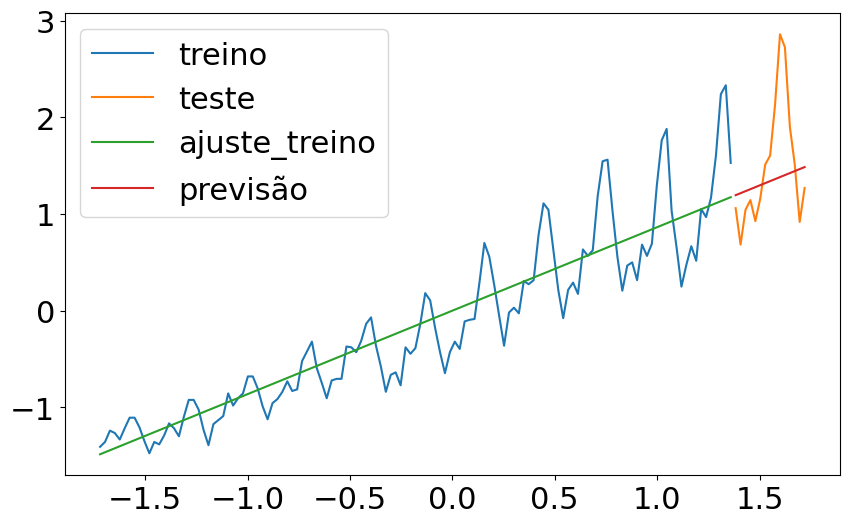

In [46]:
sns.lineplot(x=xtreino, y=ytreino, label='treino')
sns.lineplot(x=xteste, y=yteste, label='teste')
sns.lineplot(x=xtreino, y=y_predict[:,0], label='ajuste_treino')
sns.lineplot(x=xteste, y=y_predict_teste[:,0], label='previsão');

## Referências:

1. Qual a melhor função para buscar o 'loss': https://www.tensorflow.org/api_docs/python/tf/keras/losses

## Testando para funções sigmóides

In [47]:
regressor2 = Sequential()

In [48]:
regressor2.add(Dense(units = 8,
                   input_dim = 1,
                   kernel_initializer = 'random_uniform',
                   activation = 'sigmoid',
                   use_bias = False))

regressor2.add(Dense(units = 8,
                   kernel_initializer = 'random_uniform',
                   activation = 'sigmoid',
                   use_bias = False))

regressor2.add(Dense(units = 1,
                   kernel_initializer = 'random_uniform',
                   activation = 'linear',
                   use_bias = False))

In [49]:
regressor2.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [50]:
regressor2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 8)                 8         
                                                                 
 dense_6 (Dense)             (None, 8)                 64        
                                                                 
 dense_7 (Dense)             (None, 1)                 8         
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [51]:
regressor2.fit(xtreino, ytreino, epochs=500)

Epoch 1/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8328
Epoch 2/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8293
Epoch 3/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8294
Epoch 4/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8303
Epoch 5/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8301
Epoch 6/500
5/5 [==============================] - 0s 1ms/step - loss: 0.8284
Epoch 7/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8250
Epoch 8/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8212
Epoch 9/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8179
Epoch 10/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8144
Epoch 11/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8115
Epoch 12/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8069
Epoch 13/500
5/5 [==============================] - 0s 2ms/st

5/5 [==============================] - 0s 2ms/step - loss: 0.6780
Epoch 207/500
5/5 [==============================] - 0s 1ms/step - loss: 0.6759
Epoch 208/500
5/5 [==============================] - 0s 2ms/step - loss: 0.6746
Epoch 209/500
5/5 [==============================] - 0s 1ms/step - loss: 0.6738
Epoch 210/500
5/5 [==============================] - 0s 1ms/step - loss: 0.6730
Epoch 211/500
5/5 [==============================] - 0s 1ms/step - loss: 0.6726
Epoch 212/500
5/5 [==============================] - 0s 1ms/step - loss: 0.6718
Epoch 213/500
5/5 [==============================] - 0s 1ms/step - loss: 0.6711
Epoch 214/500
5/5 [==============================] - 0s 1ms/step - loss: 0.6695
Epoch 215/500
5/5 [==============================] - 0s 1ms/step - loss: 0.6683
Epoch 216/500
5/5 [==============================] - 0s 2ms/step - loss: 0.6672
Epoch 217/500
5/5 [==============================] - 0s 2ms/step - loss: 0.6660
Epoch 218/500
5/5 [==============================] - 0

5/5 [==============================] - 0s 1ms/step - loss: 0.4599
Epoch 411/500
5/5 [==============================] - 0s 1ms/step - loss: 0.4590
Epoch 412/500
5/5 [==============================] - 0s 1ms/step - loss: 0.4583
Epoch 413/500
5/5 [==============================] - 0s 2ms/step - loss: 0.4575
Epoch 414/500
5/5 [==============================] - 0s 1ms/step - loss: 0.4568
Epoch 415/500
5/5 [==============================] - 0s 1ms/step - loss: 0.4557
Epoch 416/500
5/5 [==============================] - 0s 1ms/step - loss: 0.4546
Epoch 417/500
5/5 [==============================] - 0s 1ms/step - loss: 0.4538
Epoch 418/500
5/5 [==============================] - 0s 1ms/step - loss: 0.4529
Epoch 419/500
5/5 [==============================] - 0s 1ms/step - loss: 0.4532
Epoch 420/500
5/5 [==============================] - 0s 1ms/step - loss: 0.4523
Epoch 421/500
5/5 [==============================] - 0s 1ms/step - loss: 0.4502
Epoch 422/500
5/5 [==============================] - 0

In [52]:
y_predict = regressor2.predict(xtreino)

5/5 [==============================] - 0s 1ms/step


In [53]:
y_predict_teste = regressor2.predict(xteste)

1/1 [==============================] - 0s 19ms/step


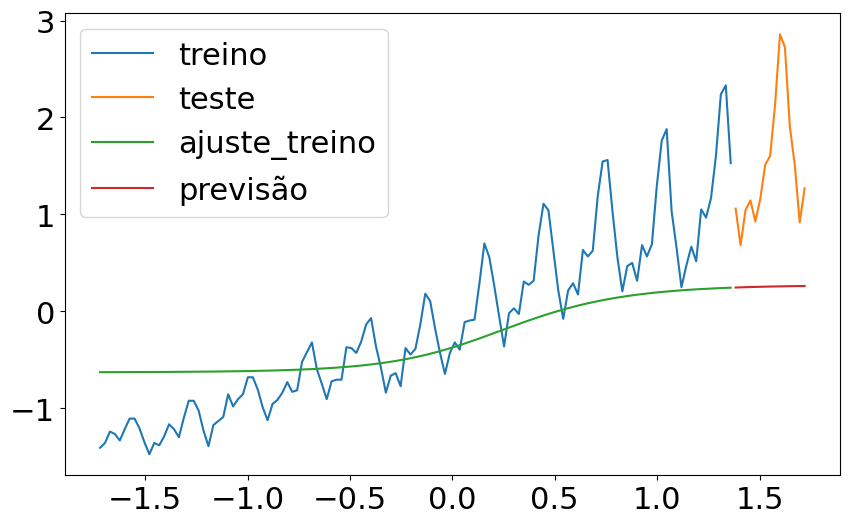

In [54]:
sns.lineplot(x=xtreino, y=ytreino, label='treino')
sns.lineplot(x=xteste, y=yteste, label='teste')
sns.lineplot(x=xtreino, y=y_predict[:,0], label='ajuste_treino')
sns.lineplot(x=xteste, y=y_predict_teste[:,0], label='previsão');

# Alterando os dados: 

* Agora x e y vão valores diferentes. X vai conter o número de passageiros em um tempo anterior e y vai conter o número de passageiros em t+1, por exemplo.

In [55]:
vetor = pd.DataFrame(ytreino)[0]

In [56]:
import numpy as np

In [57]:
def separa_dados(vetor,n_passos):

    X_novo, y_novo = [], []
    
    for i in range(n_passos,vetor.shape[0]):
        X_novo.append(list(vetor.loc[i - n_passos : i - 1]))
        y_novo.append(vetor.loc[i])
        
    X_novo, y_novo = np.array(X_novo), np.array(y_novo) 
    return X_novo, y_novo

In [58]:
xtreino_novo, ytreino_novo = separa_dados(vetor,1)

In [59]:
xtreino_novo[0:5] #X

array([[-1.40777884],
       [-1.35759023],
       [-1.24048348],
       [-1.26557778],
       [-1.33249593]])

In [60]:
ytreino_novo[0:5] #y

array([-1.35759023, -1.24048348, -1.26557778, -1.33249593, -1.21538918])

## Agora vamos separar o teste

In [61]:
vetor2 = pd.DataFrame(yteste)[0]

In [62]:
xteste_novo, yteste_novo = separa_dados(vetor2,1)

## Voltando para as redes neurais

In [63]:
regressor3 = Sequential()

In [64]:
regressor3.add(Dense(units = 8, 
                     input_dim=1, 
                     kernel_initializer='ones', 
                     activation='linear',
                     use_bias=False))

regressor3.add(Dense(units = 64, 
                     kernel_initializer='random_uniform', 
                     activation='sigmoid',
                     use_bias=False))

regressor3.add(Dense(units = 1, 
                     kernel_initializer='random_uniform', 
                     activation='linear',
                     use_bias=False))

regressor3.compile(loss='mean_squared_error',optimizer='adam')
regressor3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 8)                 8         
                                                                 
 dense_9 (Dense)             (None, 64)                512       
                                                                 
 dense_10 (Dense)            (None, 1)                 64        
                                                                 
Total params: 584
Trainable params: 584
Non-trainable params: 0
_________________________________________________________________


In [65]:
regressor3.fit(xtreino_novo, ytreino_novo, epochs = 100)

Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8030
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7553
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7327
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7166
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6962
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6735
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6467
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6208
Epoch 9/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5951
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 0.5640
Epoch 11/100
4/4 [==============================] - 0s 2ms/step - loss: 0.5312
Epoch 12/100
4/4 [==============================] - 0s 2ms/step - loss: 0.4945
Epoch 13/100
4/4 [==============================] - 0s 2ms/st

In [66]:
y_predict_novo = regressor3.predict(xtreino_novo)

4/4 [==============================] - 0s 1ms/step


<AxesSubplot:xlabel='tempo', ylabel='0'>

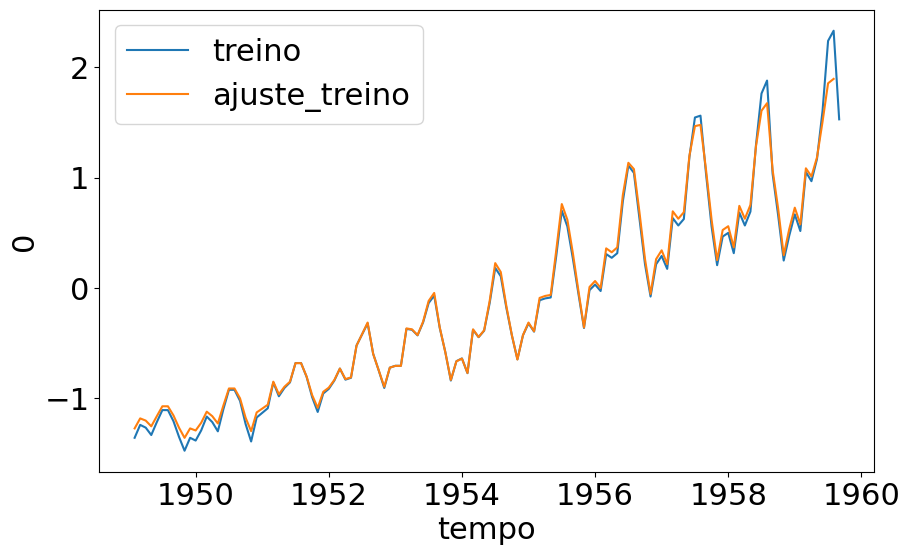

In [67]:
sns.lineplot(x='tempo',y=ytreino_novo,data=passageiros[1:129],label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0],data=passageiros[1:129],label='ajuste_treino')

In [68]:
y_predict_teste_novo = regressor3.predict(xteste_novo)

1/1 [==============================] - 0s 45ms/step


In [69]:
resultado = pd.DataFrame(y_predict_teste_novo)[0]

<AxesSubplot:xlabel='tempo', ylabel='0'>

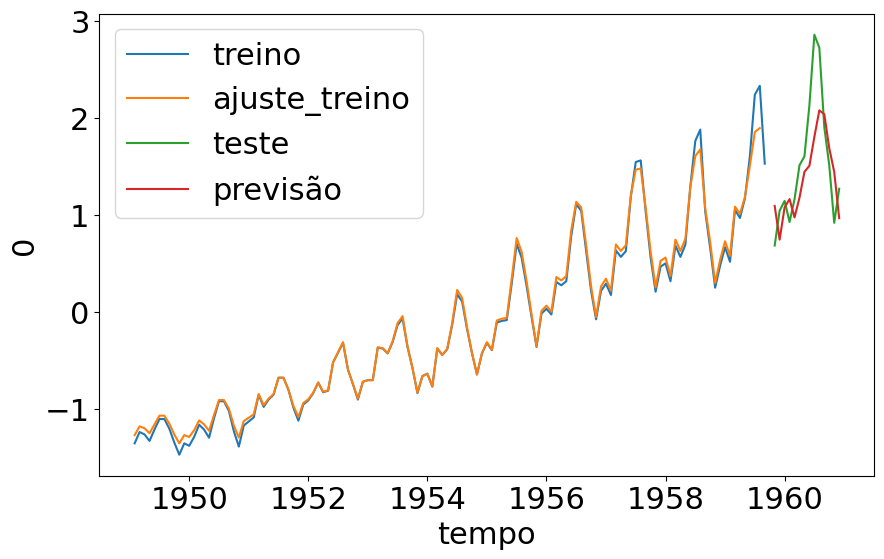

In [70]:
sns.lineplot(x='tempo',
             y=ytreino_novo,
             data=passageiros[1:129],
             label='treino')

sns.lineplot(x='tempo',
             y=pd.DataFrame(y_predict_novo)[0],
             data=passageiros[1:129],
             label='ajuste_treino')

sns.lineplot(x='tempo',
             y=yteste_novo,
             data=passageiros[130:144],
             label='teste')

sns.lineplot(x='tempo',
             y=resultado.values,
             data=passageiros[130:144],
             label='previsão')

## Janelas

In [71]:
xtreino_novo, ytreino_novo = separa_dados(vetor,4)

In [72]:
xtreino_novo[0:5] #X

array([[-1.40777884, -1.35759023, -1.24048348, -1.26557778],
       [-1.35759023, -1.24048348, -1.26557778, -1.33249593],
       [-1.24048348, -1.26557778, -1.33249593, -1.21538918],
       [-1.26557778, -1.33249593, -1.21538918, -1.10664719],
       [-1.33249593, -1.21538918, -1.10664719, -1.10664719]])

In [73]:
ytreino_novo[0:5] #y

array([-1.33249593, -1.21538918, -1.10664719, -1.10664719, -1.20702441])

In [74]:
xteste_novo, yteste_novo = separa_dados(vetor2,4)

In [80]:
regressor4 = Sequential()

In [83]:
regressor4.add(Dense(units = 8, 
                     input_dim = 4, 
                     kernel_initializer='random_uniform',
                     activation='linear',
                     use_bias=False)) #relu

regressor4.add(Dense(units = 64, 
                     kernel_initializer='random_uniform', 
                     activation='sigmoid', 
                     use_bias=False)) #relu

regressor4.add(Dense(units = 1, 
                     kernel_initializer='random_uniform', 
                     activation='linear',
                     use_bias=False))


In [84]:
regressor4.compile(loss='mean_squared_error',optimizer='adam')

In [85]:
regressor4.fit(xtreino_novo, ytreino_novo, epochs = 300)

Epoch 1/300
4/4 [==============================] - 0s 2ms/step - loss: 0.7765
Epoch 2/300
4/4 [==============================] - 0s 2ms/step - loss: 0.7639
Epoch 3/300
4/4 [==============================] - 0s 2ms/step - loss: 0.7629
Epoch 4/300
4/4 [==============================] - 0s 2ms/step - loss: 0.7650
Epoch 5/300
4/4 [==============================] - 0s 2ms/step - loss: 0.7650
Epoch 6/300
4/4 [==============================] - 0s 2ms/step - loss: 0.7613
Epoch 7/300
4/4 [==============================] - 0s 2ms/step - loss: 0.7613
Epoch 8/300
4/4 [==============================] - 0s 2ms/step - loss: 0.7617
Epoch 9/300
4/4 [==============================] - 0s 2ms/step - loss: 0.7626
Epoch 10/300
4/4 [==============================] - 0s 2ms/step - loss: 0.7629
Epoch 11/300
4/4 [==============================] - 0s 3ms/step - loss: 0.7617
Epoch 12/300
4/4 [==============================] - 0s 2ms/step - loss: 0.7613
Epoch 13/300
4/4 [==============================] - 0s 2ms/st

4/4 [==============================] - 0s 3ms/step - loss: 0.0600
Epoch 207/300
4/4 [==============================] - 0s 2ms/step - loss: 0.0598
Epoch 208/300
4/4 [==============================] - 0s 1ms/step - loss: 0.0603
Epoch 209/300
4/4 [==============================] - 0s 2ms/step - loss: 0.0599
Epoch 210/300
4/4 [==============================] - 0s 1ms/step - loss: 0.0591
Epoch 211/300
4/4 [==============================] - 0s 2ms/step - loss: 0.0601
Epoch 212/300
4/4 [==============================] - 0s 2ms/step - loss: 0.0593
Epoch 213/300
4/4 [==============================] - 0s 2ms/step - loss: 0.0600
Epoch 214/300
4/4 [==============================] - 0s 1ms/step - loss: 0.0601
Epoch 215/300
4/4 [==============================] - 0s 2ms/step - loss: 0.0592
Epoch 216/300
4/4 [==============================] - 0s 2ms/step - loss: 0.0590
Epoch 217/300
4/4 [==============================] - 0s 2ms/step - loss: 0.0590
Epoch 218/300
4/4 [==============================] - 0

In [86]:
regressor4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 8)                 32        
                                                                 
 dense_15 (Dense)            (None, 64)                512       
                                                                 
 dense_16 (Dense)            (None, 1)                 64        
                                                                 
 dense_17 (Dense)            (None, 8)                 8         
                                                                 
 dense_18 (Dense)            (None, 64)                512       
                                                                 
 dense_19 (Dense)            (None, 1)                 64        
                                                                 
Total params: 1,192
Trainable params: 1,192
Non-traina

In [87]:
y_predict_teste_novo = regressor4.predict(xteste_novo)

1/1 [==============================] - 0s 55ms/step


In [88]:
resultado = pd.DataFrame(y_predict_teste_novo)[0]

<AxesSubplot:xlabel='tempo', ylabel='0'>

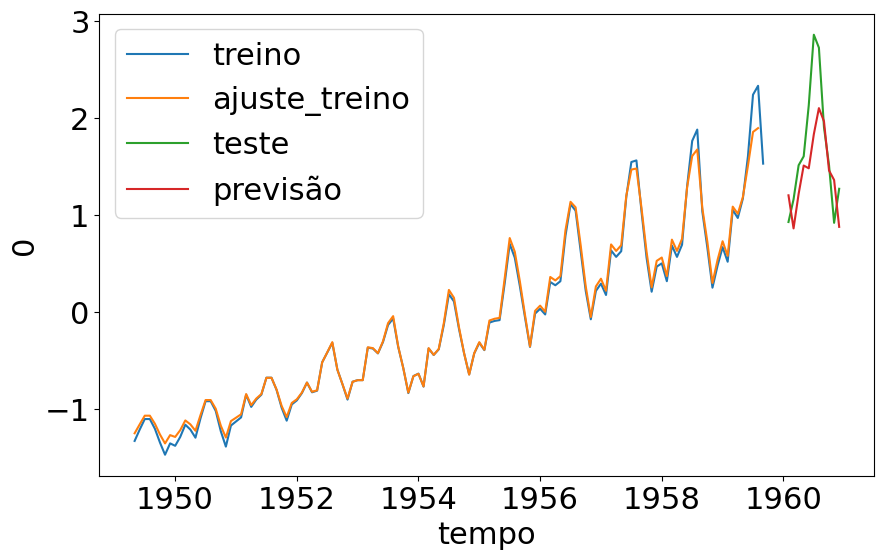

In [90]:
sns.lineplot(x='tempo',
             y=ytreino_novo,
             data=passageiros[4:129],
             label='treino')

sns.lineplot(x='tempo',
             y=pd.DataFrame(y_predict_novo)[0],
             data=passageiros[4:129],
             label='ajuste_treino')

sns.lineplot(x='tempo',
             y=yteste_novo,
             data=passageiros[133:144],
             label='teste')

sns.lineplot(x='tempo',
             y=resultado.values,
             data=passageiros[133:144],
             label='previsão')